In [ ]:
# Part A: Load dataset + choose numeric variable + population stats

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

sns.set(style="whitegrid")
RND = 42

# Load dataset (adjust path if needed)
df = pd.read_csv("globalterrorismdb_0718dist.csv", encoding="latin1", low_memory=False)

# Primary numeric column chosen for all sampling comparisons
NUM_COL = "nkill"

# Categorical columns for stratified & cluster sampling
STRAT_COL = "region_txt"
CLUSTER_COL = "country_txt"

# Prepare a working DataFrame: drop rows that do not have numeric NUM_COL (we need valid values for comparisons)
work_df = df.copy()
work_df[NUM_COL] = pd.to_numeric(work_df[NUM_COL], errors="coerce")

# Drop rows with missing nkill (so population and samples use the same base)
work_df = work_df.dropna(subset=[NUM_COL]).reset_index(drop=True)

# Population stats (on filtered population with valid nkill)
N = len(work_df)
population_mean = work_df[NUM_COL].mean()
population_median = work_df[NUM_COL].median()
population_std = work_df[NUM_COL].std()

print("Dataset shape (original):", df.shape)
print("Working dataset (rows with valid nkill):", N)
print(f"Using numeric column: {NUM_COL}")
print(f"Population mean = {population_mean:.6f}")
print(f"Population median = {population_median:.6f}")
print(f"Population std dev = {population_std:.6f}")

# quick head preview
display(work_df.head())


Dataset shape (original): (181691, 135)
Working dataset (rows with valid nkill): 171378
Using numeric column: nkill
Population mean = 2.403272
Population median = 0.000000
Population std dev = 11.545741


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
4,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN


Simple Random Sample size = 50
SRS mean = 2.280000, median = 0.000000, std = 5.245173


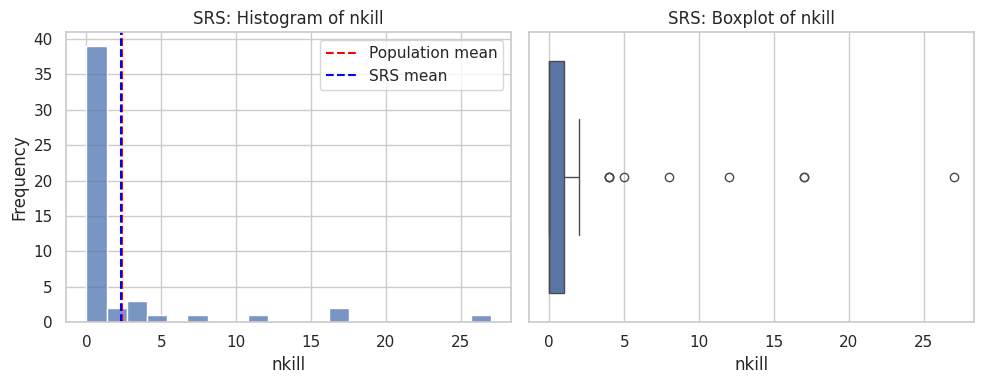

In [ ]:
# Part B: Simple Random Sampling (n = 50)

n = 50
rng = np.random.RandomState(RND)

# Simple random sample of size n from work_df
srs_sample = work_df.sample(n=n, random_state=RND).reset_index(drop=True)

# Sample stats
srs_mean = srs_sample[NUM_COL].mean()
srs_median = srs_sample[NUM_COL].median()
srs_std = srs_sample[NUM_COL].std()

print(f"Simple Random Sample size = {len(srs_sample)}")
print(f"SRS mean = {srs_mean:.6f}, median = {srs_median:.6f}, std = {srs_std:.6f}")

# Save CSV
srs_sample.to_csv("sample_simple_random_n50.csv", index=False)

# Visualizations: histogram + boxplot (Seaborn)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(srs_sample[NUM_COL], bins=20, kde=False)
plt.axvline(population_mean, color='red', linestyle='--', label='Population mean')
plt.axvline(srs_mean, color='blue', linestyle='--', label='SRS mean')
plt.title("SRS: Histogram of {}".format(NUM_COL))
plt.xlabel(NUM_COL)
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(x=srs_sample[NUM_COL])
plt.title("SRS: Boxplot of {}".format(NUM_COL))
plt.tight_layout()
plt.show()


Systematic sampling step k = 3427, start = 3174
Systematic sample size = 50
Systematic mean = 1.400000, median = 0.500000, std = 2.338672


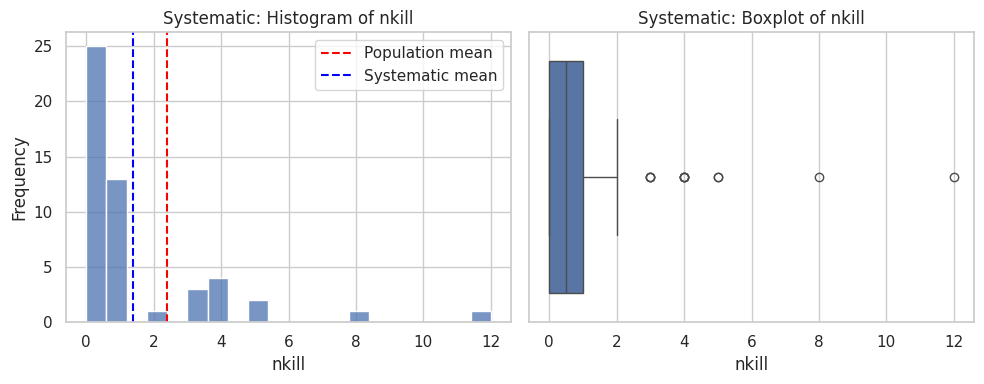

In [ ]:
# Part C: Systematic Sampling (n = 50)

n = 50
N = len(work_df)
k = N // n  # integer step
rng = np.random.RandomState(RND)
start = rng.randint(0, k)  # randomized start in [0, k-1]

# Reset index for systematic selection
reset_df = work_df.reset_index(drop=True)

# Generate systematic indices
sys_indices = list(range(start, start + k * n, k))[:n]
systematic_sample = reset_df.iloc[sys_indices].reset_index(drop=True)

# Systematic sample stats
sys_mean = systematic_sample[NUM_COL].mean()
sys_median = systematic_sample[NUM_COL].median()
sys_std = systematic_sample[NUM_COL].std()

print(f"Systematic sampling step k = {k}, start = {start}")
print(f"Systematic sample size = {len(systematic_sample)}")
print(f"Systematic mean = {sys_mean:.6f}, median = {sys_median:.6f}, std = {sys_std:.6f}")

# Save CSV
systematic_sample.to_csv("sample_systematic_n50.csv", index=False)

# Visualizations: histogram + boxplot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(systematic_sample[NUM_COL], bins=20, kde=False)
plt.axvline(population_mean, color='red', linestyle='--', label='Population mean')
plt.axvline(sys_mean, color='blue', linestyle='--', label='Systematic mean')
plt.title("Systematic: Histogram of {}".format(NUM_COL))
plt.xlabel(NUM_COL)
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(x=systematic_sample[NUM_COL])
plt.title("Systematic: Boxplot of {}".format(NUM_COL))
plt.tight_layout()
plt.show()


Stratified sample size = 50 (should be 50)
Allocation by stratum (top 10 shown):
region_txt
Australasia & Oceania           0
Central America & Caribbean     2
Central Asia                    0
East Asia                       0
Eastern Europe                  1
Middle East & North Africa     14
North America                   1
South America                   5
South Asia                     13
Southeast Asia                  4
Name: count, dtype: int64
Stratified mean = 1.100000, median = 0.000000, std = 2.314550


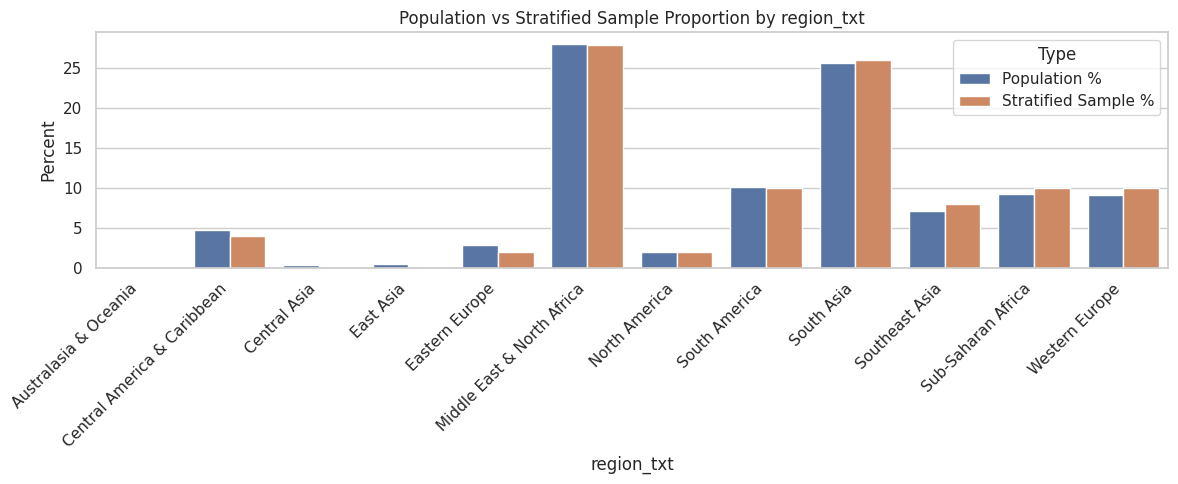

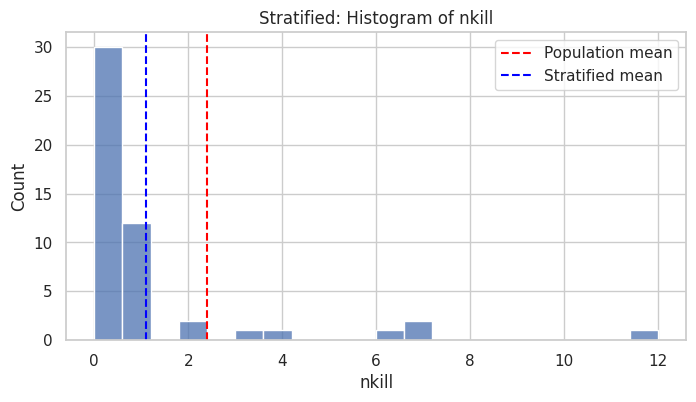

In [ ]:
# Part D: Stratified Sampling (n = 50, proportional allocation by STRAT_COL)

n = 50
rng = np.random.RandomState(RND)

# Remove rows with missing strat_col values
strat_df = work_df.dropna(subset=[STRAT_COL]).reset_index(drop=True)

# Compute population counts per stratum
stratum_counts = strat_df[STRAT_COL].value_counts().sort_index()
stratum_props = stratum_counts / stratum_counts.sum()

# Proportional allocation: floor then distribute the remainder by largest fractional parts
raw_alloc = stratum_props * n
floor_alloc = np.floor(raw_alloc).astype(int)
remainder = int(n - floor_alloc.sum())

# fractional parts
frac_parts = (raw_alloc - floor_alloc).sort_values(ascending=False)
alloc = floor_alloc.copy()

# Distribute remaining slots to strata with largest fractional parts
for stratum in frac_parts.index[:remainder]:
    alloc[stratum] += 1

# Verify allocation sums to n
assert alloc.sum() == n, "Stratified allocation did not sum to n"

# Perform stratified sampling: sample alloc[stratum] from each stratum
stratified_samples = []
for stratum, cnt in alloc.items():
    group = strat_df[strat_df[STRAT_COL] == stratum]
    # If a group has fewer rows than desired (rare), sample with replacement only as fallback
    replace_flag = False
    if len(group) < cnt:
        replace_flag = True
    sampled = group.sample(n=cnt, replace=replace_flag, random_state=RND)
    stratified_samples.append(sampled)

stratified_sample = pd.concat(stratified_samples).reset_index(drop=True)

# Stats
strat_mean = stratified_sample[NUM_COL].mean()
strat_median = stratified_sample[NUM_COL].median()
strat_std = stratified_sample[NUM_COL].std()

print(f"Stratified sample size = {len(stratified_sample)} (should be {n})")
print(f"Allocation by stratum (top 10 shown):\n{alloc.head(10)}")
print(f"Stratified mean = {strat_mean:.6f}, median = {strat_median:.6f}, std = {strat_std:.6f}")

# Save CSV
stratified_sample.to_csv("sample_stratified_n50.csv", index=False)

# Visualizations:
# 1) Distribution comparison: population vs stratified sample proportions by STRAT_COL
pop_prop = strat_df[STRAT_COL].value_counts(normalize=True).sort_index() * 100
sample_prop = stratified_sample[STRAT_COL].value_counts(normalize=True).reindex(pop_prop.index).fillna(0) * 100
prop_df = pd.DataFrame({"Population %": pop_prop, "Stratified Sample %": sample_prop})

plt.figure(figsize=(12,5))
prop_df_plot = prop_df.reset_index().melt(id_vars=STRAT_COL, var_name='Type', value_name='Percent')
sns.barplot(x=STRAT_COL, y='Percent', hue='Type', data=prop_df_plot)
plt.xticks(rotation=45, ha='right')
plt.title("Population vs Stratified Sample Proportion by {}".format(STRAT_COL))
plt.tight_layout()
plt.show()

# 2) Histogram for nkill in stratified sample
plt.figure(figsize=(8,4))
sns.histplot(stratified_sample[NUM_COL], bins=20, kde=False)
plt.axvline(population_mean, color='red', linestyle='--', label='Population mean')
plt.axvline(strat_mean, color='blue', linestyle='--', label='Stratified mean')
plt.title("Stratified: Histogram of {}".format(NUM_COL))
plt.legend()
plt.show()


Clusters fully included: 3
Rows from full clusters: 50
Extra rows sampled to reach n: 0
Final cluster sample size = 50 (should be 50)
Cluster sample mean = 0.780000, median = 0.000000, std = 2.375814


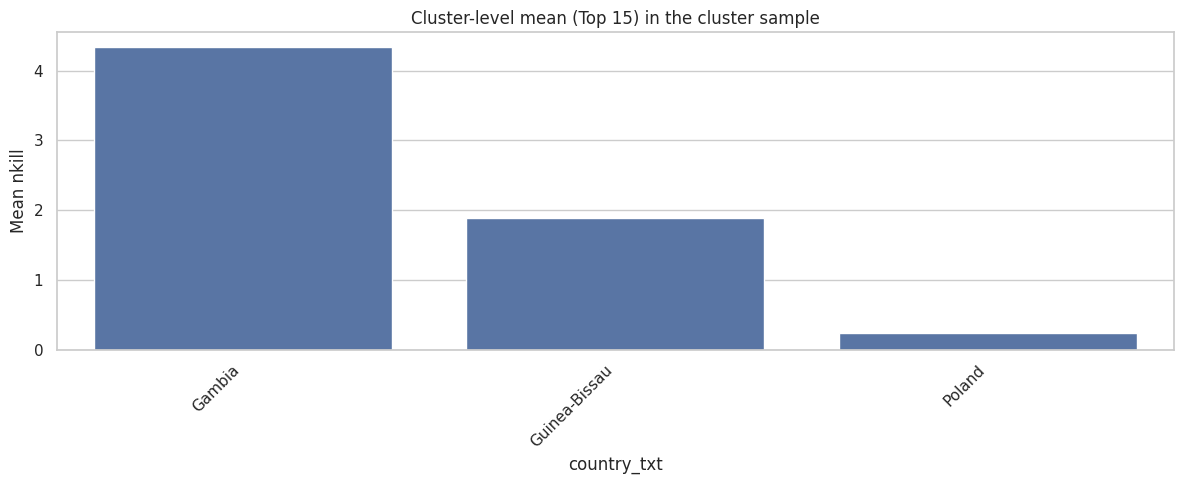

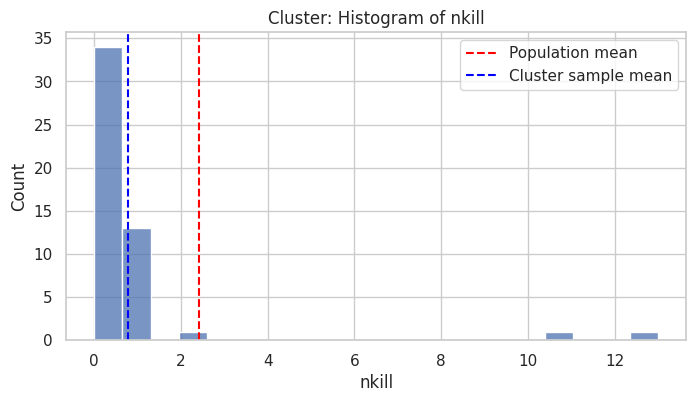

In [ ]:
# Part E: Cluster Sampling (n = 50)
# Strategy (Option A): Add full clusters sequentially until adding another full cluster would exceed 50.
# Then fill remaining slots by random sampling from the remaining rows (to reach exactly n).

n = 50
rng = np.random.RandomState(RND)

# Prepare cluster groups: cluster by CLUSTER_COL, only rows with non-missing cluster
cluster_df = work_df.dropna(subset=[CLUSTER_COL]).reset_index(drop=True)
cluster_sizes = cluster_df[CLUSTER_COL].value_counts()

# Shuffle clusters for random selection order
clusters = cluster_sizes.index.tolist()
rng.shuffle(clusters)

selected_clusters = []
accumulated_count = 0
for c in clusters:
    c_size = int(cluster_sizes.loc[c])
    if accumulated_count + c_size <= n:
        # include full cluster
        selected_clusters.append(c)
        accumulated_count += c_size
    else:
        # cannot include this cluster fully without exceeding n
        continue

# Rows selected from full clusters
full_cluster_rows = cluster_df[cluster_df[CLUSTER_COL].isin(selected_clusters)].copy()
remaining_needed = n - len(full_cluster_rows)

# If we already reached n (exactly), great. Otherwise, randomly sample remaining_needed rows from
# rows NOT in selected_clusters to fill up to n
if remaining_needed > 0:
    pool = cluster_df[~cluster_df[CLUSTER_COL].isin(selected_clusters)]
    # If pool has fewer rows than needed, sample with replacement as fallback (unlikely)
    replace_flag = len(pool) < remaining_needed
    extra_rows = pool.sample(n=remaining_needed, random_state=RND, replace=replace_flag)
    cluster_sample = pd.concat([full_cluster_rows, extra_rows]).reset_index(drop=True)
else:
    cluster_sample = full_cluster_rows.reset_index(drop=True)

# Final cluster sample stats
cluster_mean = cluster_sample[NUM_COL].mean()
cluster_median = cluster_sample[NUM_COL].median()
cluster_std = cluster_sample[NUM_COL].std()

print(f"Clusters fully included: {len(selected_clusters)}")
print(f"Rows from full clusters: {len(full_cluster_rows)}")
print(f"Extra rows sampled to reach n: {max(0, remaining_needed)}")
print(f"Final cluster sample size = {len(cluster_sample)} (should be {n})")
print(f"Cluster sample mean = {cluster_mean:.6f}, median = {cluster_median:.6f}, std = {cluster_std:.6f}")

# Save CSV
cluster_sample.to_csv("sample_cluster_n50.csv", index=False)

# Visualizations:
# 1) Cluster-level mean (for clusters included fully + top clusters)
cluster_level_means = cluster_sample.groupby(CLUSTER_COL)[NUM_COL].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(12,5))
sns.barplot(x=cluster_level_means.index, y=cluster_level_means.values)
plt.xticks(rotation=45, ha='right')
plt.title("Cluster-level mean (Top 15) in the cluster sample")
plt.ylabel(f"Mean {NUM_COL}")
plt.tight_layout()
plt.show()

# 2) Histogram for nkill in cluster sample
plt.figure(figsize=(8,4))
sns.histplot(cluster_sample[NUM_COL], bins=20, kde=False)
plt.axvline(population_mean, color='red', linestyle='--', label='Population mean')
plt.axvline(cluster_mean, color='blue', linestyle='--', label='Cluster sample mean')
plt.title("Cluster: Histogram of {}".format(NUM_COL))
plt.legend()
plt.show()


,Method,Sample Size,Mean,Median,StdDev
0,Population,171378,2.403272,0.000000,11.545741
1,Simple Random,50,2.280000,0.000000,5.245173
2,Systematic,50,1.400000,0.500000,2.338672
3,Stratified,50,1.100000,0.000000,2.314550
4,Cluster,50,0.780000,0.000000,2.375814


/tmp/ipython-input-2861525322.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Method", y="Mean", data=comparison_df, palette="muted")


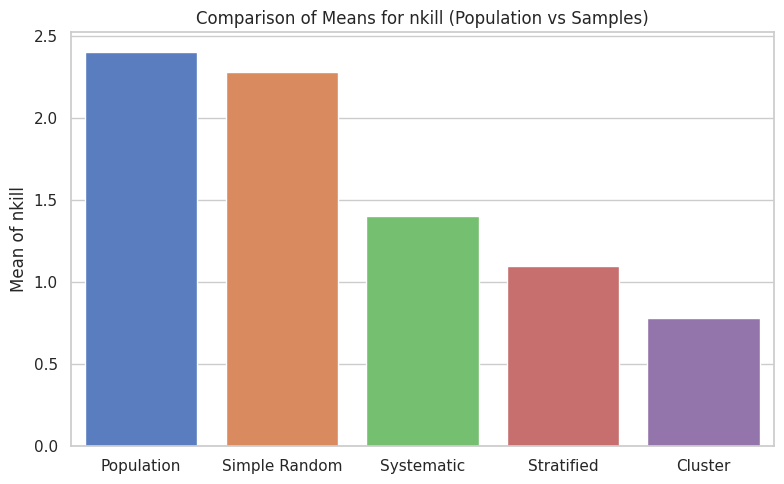

Saved files:
- sample_simple_random_n50.csv
- sample_systematic_n50.csv
- sample_stratified_n50.csv
- sample_cluster_n50.csv
- sampling_comparison_summary.csv


In [ ]:
# Part F: Comparison table + bar chart

# Build comparison DataFrame
comparison_df = pd.DataFrame({
    "Method": ["Population", "Simple Random", "Systematic", "Stratified", "Cluster"],
    "Sample Size": [len(work_df), len(srs_sample), len(systematic_sample), len(stratified_sample), len(cluster_sample)],
    "Mean": [population_mean, srs_mean, sys_mean, strat_mean, cluster_mean],
    "Median": [population_median, srs_median, sys_median, strat_median, cluster_median],
    "StdDev": [population_std, srs_std, sys_std, strat_std, cluster_std]
})

# Display table
display(comparison_df.style.set_caption("Comparison of Population and Sampling Methods (n=50)"))

# Save comparison CSV
comparison_df.to_csv("sampling_comparison_summary.csv", index=False)

# Bar chart of means (Seaborn)
plt.figure(figsize=(8,5))
sns.barplot(x="Method", y="Mean", data=comparison_df, palette="muted")
plt.title(f"Comparison of Means for {NUM_COL} (Population vs Samples)")
plt.ylabel(f"Mean of {NUM_COL}")
plt.xlabel("")
plt.tight_layout()
plt.savefig("comparison_means_barplot.png")
plt.show()

# Also save all sample CSVs (already saved in each step) - list them to confirm
print("Saved files:")
print("- sample_simple_random_n50.csv")
print("- sample_systematic_n50.csv")
print("- sample_stratified_n50.csv")
print("- sample_cluster_n50.csv")
print("- sampling_comparison_summary.csv")


### Justification for Column Selection

#### 1. Numeric Column: `nkill` (Number of individuals killed)
*   **Significance:** `nkill` represents the number of fatalities in a terrorist attack. In the context of terrorism data, this is a crucial quantitative measure of the severity, impact, and human cost of an incident. It allows for direct numerical comparisons and statistical analysis of the scale of violence across different events, regions, and time periods.
*   **Analytical Role:** As the primary numeric column, `nkill` is used to calculate key statistics such as means, medians, and standard deviations for the population and all sampled subsets. These statistics are fundamental for comparing the representativeness and accuracy of different sampling methods.

#### 2. Stratified Sampling Column: `region_txt` (Textual region of attack)
*   **Rationale for Stratification:** The `region_txt` column categorizes attacks into distinct geographical regions (e.g., 'Middle East & North Africa', 'South Asia', 'Western Europe'). Terrorism patterns, frequencies, and impacts often vary significantly by region due to geopolitical, socio-economic, and cultural factors.
*   **Benefits:** Stratifying by `region_txt` ensures that each major geographical region is adequately represented in the sample, in proportion to its size in the population. This method reduces sampling error and provides more precise estimates of population parameters (like the mean `nkill`) by accounting for inherent heterogeneity across regions. It prevents a sample from being over- or under-represented by any particular region, thereby yielding a more balanced and representative sample.

#### 3. Cluster Sampling Column: `country_txt` (Country where the attack occurred)
*   **Rationale for Clustering:** `country_txt` groups attacks by the country in which they took place. Countries naturally form clusters of related events, as incidents within a country may share common underlying causes, operational groups, or security contexts. It is often more practical and cost-effective to sample entire clusters (countries) rather than individual incidents randomly spread across many countries.
*   **Implications:** When using `country_txt` as the cluster variable, the sampling unit becomes the country rather than the individual attack. This implies that once a country (cluster) is selected, all or a subset of attacks within that country are included. While this approach might introduce higher sampling error compared to simple random sampling if clusters are highly homogeneous internally, it can be very efficient for large-scale datasets and real-world data collection scenarios where it is easier to study all instances within a selected cluster. The chosen strategy (Option A) aims to select a few countries entirely and then sample from others to reach the desired total sample size, demonstrating a practical application of cluster sampling.

## Comparison and Reflection of Results



* **Summary of Key Statistics**

Let's first review the key statistics for the population and each sampling method from the `comparison_df`:

| Method        | Sample Size | Mean       | Median | StdDev     |
|:--------------|:------------|:-----------|:-------|:-----------|
| Population    | 171378      | 2.403272   | 0.0    | 11.545741  |
| Simple Random | 50          | 2.280000   | 0.0    | 5.245173   |
| Systematic    | 50          | 1.400000   | 0.5    | 2.338672   |
| Stratified    | 50          | 1.100000   | 0.0    | 2.314550   |
| Cluster       | 50          | 0.780000   | 0.0    | 2.375814   |

The population mean for `nkill` (number of killed) is approximately 2.40. The median is 0, indicating a highly skewed distribution with many incidents having zero kills. The standard deviation is high (11.55), reflecting the wide range and presence of extreme values (high-casualty events).

*   **Simple Random Sample (SRS)**: The SRS mean (2.28) is relatively close to the population mean (2.40), making it the closest among the samples. Its median (0) matches the population median. However, its standard deviation (5.25) is considerably lower than the population's, suggesting it might have missed some of the high-outlier events that contribute to the population's large std dev.
*   **Systematic Sample**: The systematic sample mean (1.40) is notably lower than the population mean, and its median (0.5) is slightly higher than the population's 0. Its standard deviation (2.34) is also significantly lower, indicating a compressed spread compared to the population.
*   **Stratified Sample**: The stratified sample yielded a mean (1.10) that is even further from the population mean than the systematic sample. Its median (0) matches the population's. The standard deviation (2.31) is similarly low, comparable to the systematic sample.
*   **Cluster Sample**: The cluster sample shows the lowest mean (0.78) among all methods, significantly underestimating the population mean. Its median (0) matches, but its standard deviation (2.38) is also much lower than the population's, similar to stratified and systematic samples.

In terms of mean approximation, Simple Random Sampling performed best for this specific run. All sampling methods significantly underestimated the population standard deviation, likely due to the small sample size (n=50) in the presence of a highly skewed distribution with extreme outliers.



*   **Population Characteristics:** The `nkill` variable is highly skewed, with a population mean of approximately 2.40, a median of 0 (indicating many incidents with no fatalities), and a high standard deviation of 11.55, reflecting the presence of extreme outlier events.

*   **Sampling Method Performance (Mean Approximation):**
    *   **Simple Random Sampling (SRS)** achieved the closest mean approximation to the population mean (2.28 vs. 2.40) among all methods in this specific run.
    *   **Systematic Sampling** (mean 1.40), **Stratified Sampling** (mean 1.10), and **Cluster Sampling** (mean 0.78) all significantly underestimated the population mean. Cluster sampling showed the lowest mean, indicating the poorest approximation.

*   **Standard Deviation Underestimation:** All sampling methods, despite their varying performance in mean approximation, consistently underestimated the population's high standard deviation of 11.55 (SRS: 5.25; Systematic: 2.34; Stratified: 2.31; Cluster: 2.38). This suggests that the small sample size (n=50) struggled to capture the rare, high-impact events that contribute significantly to the population's overall spread.

*   **Visualizations Insights:**
    *   Histograms showed that while SRS's mean was close to the population mean, other methods' means were noticeably shifted left, confirming their underestimation.
    *   The Stratified Distribution Comparison confirmed that stratified sampling effectively maintained the proportional representation of `region_txt` across the sample and population, demonstrating its success in preserving demographic structure.
    *   The Cluster-Level Means revealed significant variability among selected clusters, illustrating how the specific clusters chosen heavily influenced the overall low mean of the cluster sample.

*   **Effectiveness and Biases:**
    *   **SRS** proved surprisingly effective for mean estimation in this instance but is prone to high sampling variability with small sizes and skewed data.
    *   **Systematic Sampling**'s performance was suboptimal, potentially due to hidden patterns or just chance given the small sample size.
    *   **Stratified Sampling**, while excellent for demographic representativeness, struggled to capture `nkill`'s variability within strata due to the small sample size per stratum.
    *   **Cluster Sampling** exhibited the highest potential for bias and error, particularly when clusters are homogeneous internally but differ significantly from each other, leading to poor mean estimates.

### Insights or Next Steps

*   For analyzing highly skewed variables with significant outliers, like `nkill`, a larger sample size is crucial across all sampling methods to more accurately estimate population parameters, especially the standard deviation.
*   If precise estimation of `nkill` remains a primary goal for stratified sampling, consider using a stratification variable that is more directly correlated with `nkill` (e.g., 'attacktype_txt' or 'weaptype1_txt') to create more internally homogeneous strata regarding kill counts, thereby reducing within-stratum variance and improving accuracy.
